<a href="https://colab.research.google.com/github/Yuji-github/YOLOv4/blob/main/YOLO_Custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**If it does not work, we have to start over for YOLO**

**Connecting Google Drive where YOLO is existing or download**

In [ ]:
import cv2
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Get Clone frome GIt "AlexeyAB" is modified version**

In [ ]:
!git clone 'https://github.com/AlexeyAB/darknet/' '/content/drive/MyDrive/YOLO_Custom/darknet'

**Chnage the location**

In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom/darknet

/content/drive/MyDrive/YOLO_Custom/darknet


***Make sure MakeFIle is compiled ***

In [ ]:
!make

After compile, Download MakeFile. 
YOLO_Custom -> darknet -> Makefile

Open with Notepad and modify
GPU, CUDNN, OPENCV = 1

Then, Delete previous MakeFile. 

Upload modified (same name/folder location) Makefile

If errors occur (GPU can't use), need to run !make after uploaded MakeFile 

Create pre-trained model folder

In [ ]:
%mkdir custom_weight

Uploaded the weight to the custom_weight folder via Google Drive

 http://pjreddie.com/media/files/darkn... 

**Change the location **

In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom 

**Download/Upload Dataset **
Ex) Data downloaded from RobotFlow 

In [ ]:
!curl -L "https://public.roboflow.com/ds/b9VVem7inH?key=******" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip


Create Data Folder at YOLO_Custom

In [ ]:
%mkdir data

**Creating files for YOLO, if YOLO does not work, check these files**

In [ ]:
%cp train/_darknet.labels data/obj.names # create files for learning, make sure correct location and create data folder for each custome detection
%mkdir data/obj # if data folder is not empty, make new data1, data2 and so on and change the folder names
#copy image and labels
%cp train/*.jpg data/obj/
%cp valid/*.jpg data/obj/

%cp train/*.txt data/obj/
%cp valid/*.txt data/obj/

with open('data/obj.data', 'w') as out:
  out.write('classes = 3\n')
  out.write('train = data/train.txt\n')
  out.write('valid = data/valid.txt\n')
  out.write('names = data/obj.names\n')
  out.write('backup = backup/')

#write train file (just the image list)
import os

with open('data/train.txt', 'w') as out:
  for img in [f for f in os.listdir('train') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

#write the valid file (just the image list)
import os

with open('data/valid.txt', 'w') as out:
  for img in [f for f in os.listdir('valid') if f.endswith('jpg')]:
    out.write('data/obj/' + img + '\n')

**Giving the permission to access darknet from /content/drive/MyDrive/YOLO_Custom**
If permission error occurs

In [ ]:
!chmod +x ./darknet # if the location is different try !chmod +x darknet/darknet

**Modify(download) Config File for the datasets**

Set batch size to 64 - batch size is the number of images per iteration

Set subdivisions to 12 - subdivisions are the number of pieces your batch is broken into for GPU memory.

max_batches to 2000 * number of classes

steps to 80% and 90% of max batches

change num_classes in all of the YOLO layers

change filters in all of the YOLO layers

https://blog.roboflow.com/training-yolov4-on-a-custom-dataset/

Traing the dataset make sure all location, folder, and file names are correct


1.   train data/labelled_data.data : is get trainig images via the .data files
2.   darknet/cfg/yolov4_custom.cfg : cofigurations for this dataset
3. custom_weight/yolov4.conv.137 : can select pre-trained weights
4. -dont_show : hide steps


Need the below steps all yolo (3 layers) and convolutional layers (right before yolo layers)


[Convolutional]
filters = (Your Classes + 5)*3

ex) if you have 3 classes, (3+5) * 3 = 24

[YOLO]
classes = Your classes 

In [ ]:
!darknet/darknet detector train data/data.data darknet/cfg/yolov4_custom.cfg custom_weight/yolov4.conv.137 -dont_show #train data/obj.data

**For testing, must change the batch and subdivisons**

In [ ]:
!sed -i 's/batch=64/batch=1/' cfg/yolov4_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' cfg/yolov4_custom.cfg

**Evaluation** 

In [ ]:
#define utility function
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  #plt.rcParams['figure.figsize'] = [10, 5]
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

In [ ]:
%cd /content/drive/MyDrive/YOLO_Custom

/content/drive/MyDrive/YOLO_Custom


In [ ]:
#check if weigths have saved yet
#backup houses the last weights for our detector
#(file yolo-obj_last.weights will be saved to the build\darknet\x64\backup\ for each 100 iterations)
#(file yolo-obj_xxxx.weights will be saved to the build\darknet\x64\backup\ for each 1000 iterations)
#After training is complete - get result yolo-obj_final.weights from path build\darknet\x64\bac
!ls backup
#if it is empty you haven't trained for long enough yet, you need to train for at least 100 iterations

yolov4_custom_1000.weights  yolov4_custom_last.weights
yolov4_custom_2000.weights


**Not necessary to run the below code**

In [ ]:
#coco.names is hardcoded somewhere in the detector
# %cp data/obj.names data/coco.names
# %cp data/obj.data data/coco.data

**Make sure own data folder contain before you run this code. 
The labels folder where is located in (original) darknet/data folder**

 CUDA-version: 11000 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 0, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv     64       1 x 1/ 1    208 x 

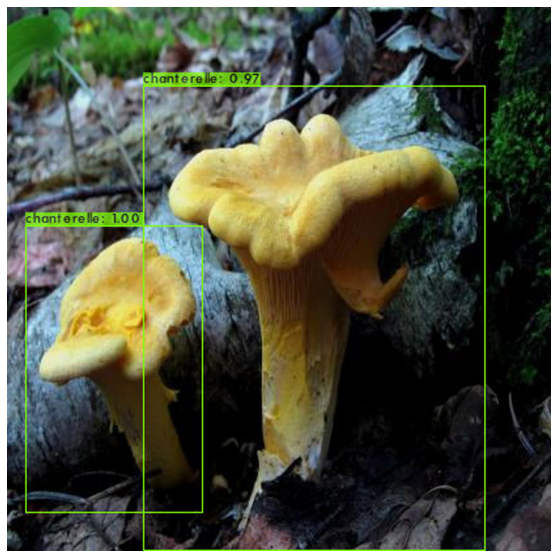

In [ ]:
#/test has images that we can test our detector on
import os
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

#test out our detector!
!darknet/darknet detector test data/obj.data darknet/cfg/yolov4_custom.cfg backup/yolov4_custom_last.weights {img_path} -dont-show
imShow('/content/drive/MyDrive/YOLO_Custom/predictions.jpg')